<a href="https://colab.research.google.com/github/hwangsaeyeon/dacon/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [2]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=a7ce0fe28d928eebb1cfb6415bb3bf54aa4ad3ea999d3fc31159d581b1833ca7
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 6.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 6.6 MB/s 
     |████████████████████████████████| 3.3 MB 60.5 MB/s 
     |████████████████████████████████| 2.0 MB 40.7 MB/s 
     |████████████████████████████████| 134 kB 52.0 MB/s 
     |████████████████████████████████| 56 kB 2.3 MB/s 
     |████████████████████████████████| 10.4 MB 10.4 MB/s 
     |████████████████████████████████| 1.7 MB 51.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 262 kB 54.7 MB/s 
     |████████████████████████████████| 636 kB 49.6 MB/s 
     |████████████████████████████████| 167 kB 54.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 88 kB 8.6 MB/s 
     |████████████████████████████████| 

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [6]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 



#데이터 불러오기

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

train = pd.read_csv("/content/drive/MyDrive/mood/train.csv",index_col=0)
test = pd.read_csv("/content/drive/MyDrive/mood/test.csv",index_col=0)
submission = pd.read_csv("/content/drive/MyDrive/mood/sample_submission.csv",index_col=0)

# Question

In [5]:
Q = []

for i in range(1, 27):
    Q.append('Q'+str(i))

In [6]:
train['Match_score'] = train[Q].sum(axis = 1)
train.iloc[:20]

test['Match_score'] = test[Q].sum(axis=1)
test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,Match_score
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,3.0,4.0,5.0,4.0,5.0,2.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,CHL,9,114,243,2.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,1.0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,2.0,3,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0,109.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,5.0,USA,18,107,206,1.0,4.0,3.0,5.0,4.0,5.0,3.0,3.0,3.0,1.0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,2.0,2,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0,112.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,1.0,5.0,5.0,4.0,4.0,3.0,4.0,5.0,2.0,3.0,5.0,4.0,5.0,5.0,1.0,5.0,IDN,4,87,191,3.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,2.0,1.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1.0,3,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0,109.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0,AUS,2409,155,258,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,1.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,2.0,2,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0,98.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,5.0,2.0,3.0,5.0,5.0,3.0,3.0,PHL,24,163,289,3.0,3.0,3.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2.0,3,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,5.0,4.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,5.0,3.0,USA,10,200,254,3.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,3.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2.0,3,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0,108.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,4.0,4.0,3.0,5.0,GBR,504,136,155,3.0,3.0,5.0,5.0,3.0,5.0,5.0,3.0,1.0,2.0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,1,1,2.0,2,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0,115.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,3.0,5.0,1.0,5.0,5.0,4.0,5.0,USA,27,121,191,1.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,2.0,1.0,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,1,3.0,3,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0,119.0


# VCL

In [7]:
def score_vocab(df):
    '''Adds up correct answers on real words.'''
    
    df['Vocab_Score'] = (df['VCL1'] + df['VCL2'] + df['VCL3'] + df['VCL4'] + df['VCL5'] + df['VCL7']
                         + df['VCL8'] + df['VCL10'] + df['VCL11'] + df['VCL13'] + df['VCL14']
                         + df['VCL15'] + df['VCL16'] )
  
    
    return df

In [8]:
train = score_vocab(train)

In [9]:
test = score_vocab(test)

# TIPI

In [10]:
train['conscientiousness'] = ((train['TIPI3']+(6-train['TIPI8']))/2)
train['affinity'] = ((train['TIPI7']+(6-train['TIPI2']))/2)
train['stability'] = ((train['TIPI9']+(6-train['TIPI4']))/2)
train['openness'] = ((train['TIPI5']+(6-train['TIPI10']))/2)
train['extroversion'] = ((train['TIPI1']+(6-train['TIPI6']))/2)

In [11]:
test['conscientiousness'] = ((test['TIPI3']+(6-test['TIPI8']))/2)
test['affinity'] = ((test['TIPI7']+(6-test['TIPI2']))/2)
test['stability'] = ((test['TIPI9']+(6-test['TIPI4']))/2)
test['openness'] = ((test['TIPI5']+(6-test['TIPI10']))/2)
test['extroversion'] = ((test['TIPI1']+(6-test['TIPI6']))/2)

# Country

In [12]:
country_map = {}

for i, c in enumerate(train['country'].unique()):
    country_map[c] = i

In [13]:
train['country'] = train['country'].map(country_map)

In [14]:
test['country'] = test['country'].map(country_map)

#질문 빈도 계산(1,5번 대답 비율)

In [16]:
question = train.columns[0:26]

five= []
one = []
for i in train.index:
  val1 = 0
  val5 = 0 
  for j in question:
    if train[j][i] == 1:
      val1+=1
    elif train[j][i] == 5:
      val5+=1 
  one.append(val1/26)
  five.append(val5/26)

In [17]:
train.loc[:,'val1']=one
train.loc[:,'val5']=five
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Match_score,Vocab_Score,conscientiousness,affinity,stability,openness,extroversion,val1,val5
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,0,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1,95.0,8,4.0,4.0,5.0,3.0,2.5,0.307692,0.615385
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,0,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,85.0,11,4.0,4.5,1.5,3.5,4.0,0.192308,0.192308
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,1,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1,96.0,11,2.5,3.5,5.0,4.5,1.0,0.076923,0.423077
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,0,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1,91.0,9,2.5,3.5,2.5,4.0,3.0,0.000000,0.115385
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,2,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0,90.0,8,3.0,3.0,2.5,4.0,2.5,0.038462,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,0,12,103,161,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0,87.0,10,3.5,3.5,3.0,3.0,1.5,0.076923,0.115385
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,0,31,106,179,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1,105.0,8,4.5,4.0,1.5,4.0,3.0,0.076923,0.384615
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,0,17,103,168,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1,120.0,9,2.5,3.0,1.0,3.0,1.0,0.000000,0.730769


In [18]:
five= []
one = []
for i in test.index:
  val1 = 0
  val5 = 0 
  for j in question:
    if test[j][i] == 1:
      val1+=1
    elif test[j][i] == 5:
      val5+=1 
  one.append(val1/26)
  five.append(val5/26)

In [19]:
test.loc[:,'val1']=one
test.loc[:,'val5']=five

#이상치 처리

In [23]:
for i in train.index:
  if train['introelapse'][i] >= train['introelapse'].median():
    train.loc[i,'intro_time'] = 1
  else:
    train.loc[i,'intro_time'] = 0 

  if train['testelapse'][i] >= train['testelapse'].median():
    train.loc[i,'test_time'] = 1
  else:
    train.loc[i,'test_time']=0


  if train['surveyelapse'][i] >= train['surveyelapse'].median():
    train.loc[i,'survey_time'] = 1
  else:
    train.loc[i,'survey_time'] = 0 

  if train['age'][i] >= train['age'].median():
    train.loc[i,'age_old'] = 1
  else:
    train.loc[i,'age_old'] = 0 

  if train['familysize'][i] >= train['familysize'].median():
    train.loc[i, 'familysize_big'] = 1
  else:
    train.loc[i, 'familysize_big'] = 0 

In [20]:
for i in test.index:
  if test['introelapse'][i] >= train['introelapse'].median():
    test.loc[i,'intro_time'] = 1
  else:
    test.loc[i,'intro_time'] = 0 

  if test['testelapse'][i] >= train['testelapse'].median():
    test.loc[i,'test_time'] = 1
  else:
    test.loc[i,'test_time']=0


  if test['surveyelapse'][i] >= train['surveyelapse'].median():
    test.loc[i,'survey_time'] = 1
  else:
    test.loc[i,'survey_time'] = 0 

  if test['age'][i] >= train['age'].median():
    test.loc[i,'age_old'] = 1
  else:
    test.loc[i,'age_old'] = 0 

  if test['familysize'][i] >= train['familysize'].median():
    test.loc[i, 'familysize_big'] = 1
  else:
    test.loc[i, 'familysize_big'] = 0 

#피쳐 선택

In [24]:
train = train.drop(columns=['country', 'introelapse','testelapse','surveyelapse', 'age', 'familysize', 
                            'VCL1', 'VCL2','VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
                            'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16',])

In [21]:
test = test.drop(columns=['country', 'introelapse','testelapse','surveyelapse', 'age', 'familysize', 
                            'VCL1', 'VCL2','VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
                            'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16',])

In [33]:
if len(train.columns)-1 == len(test.columns):
  print('ready')

ready


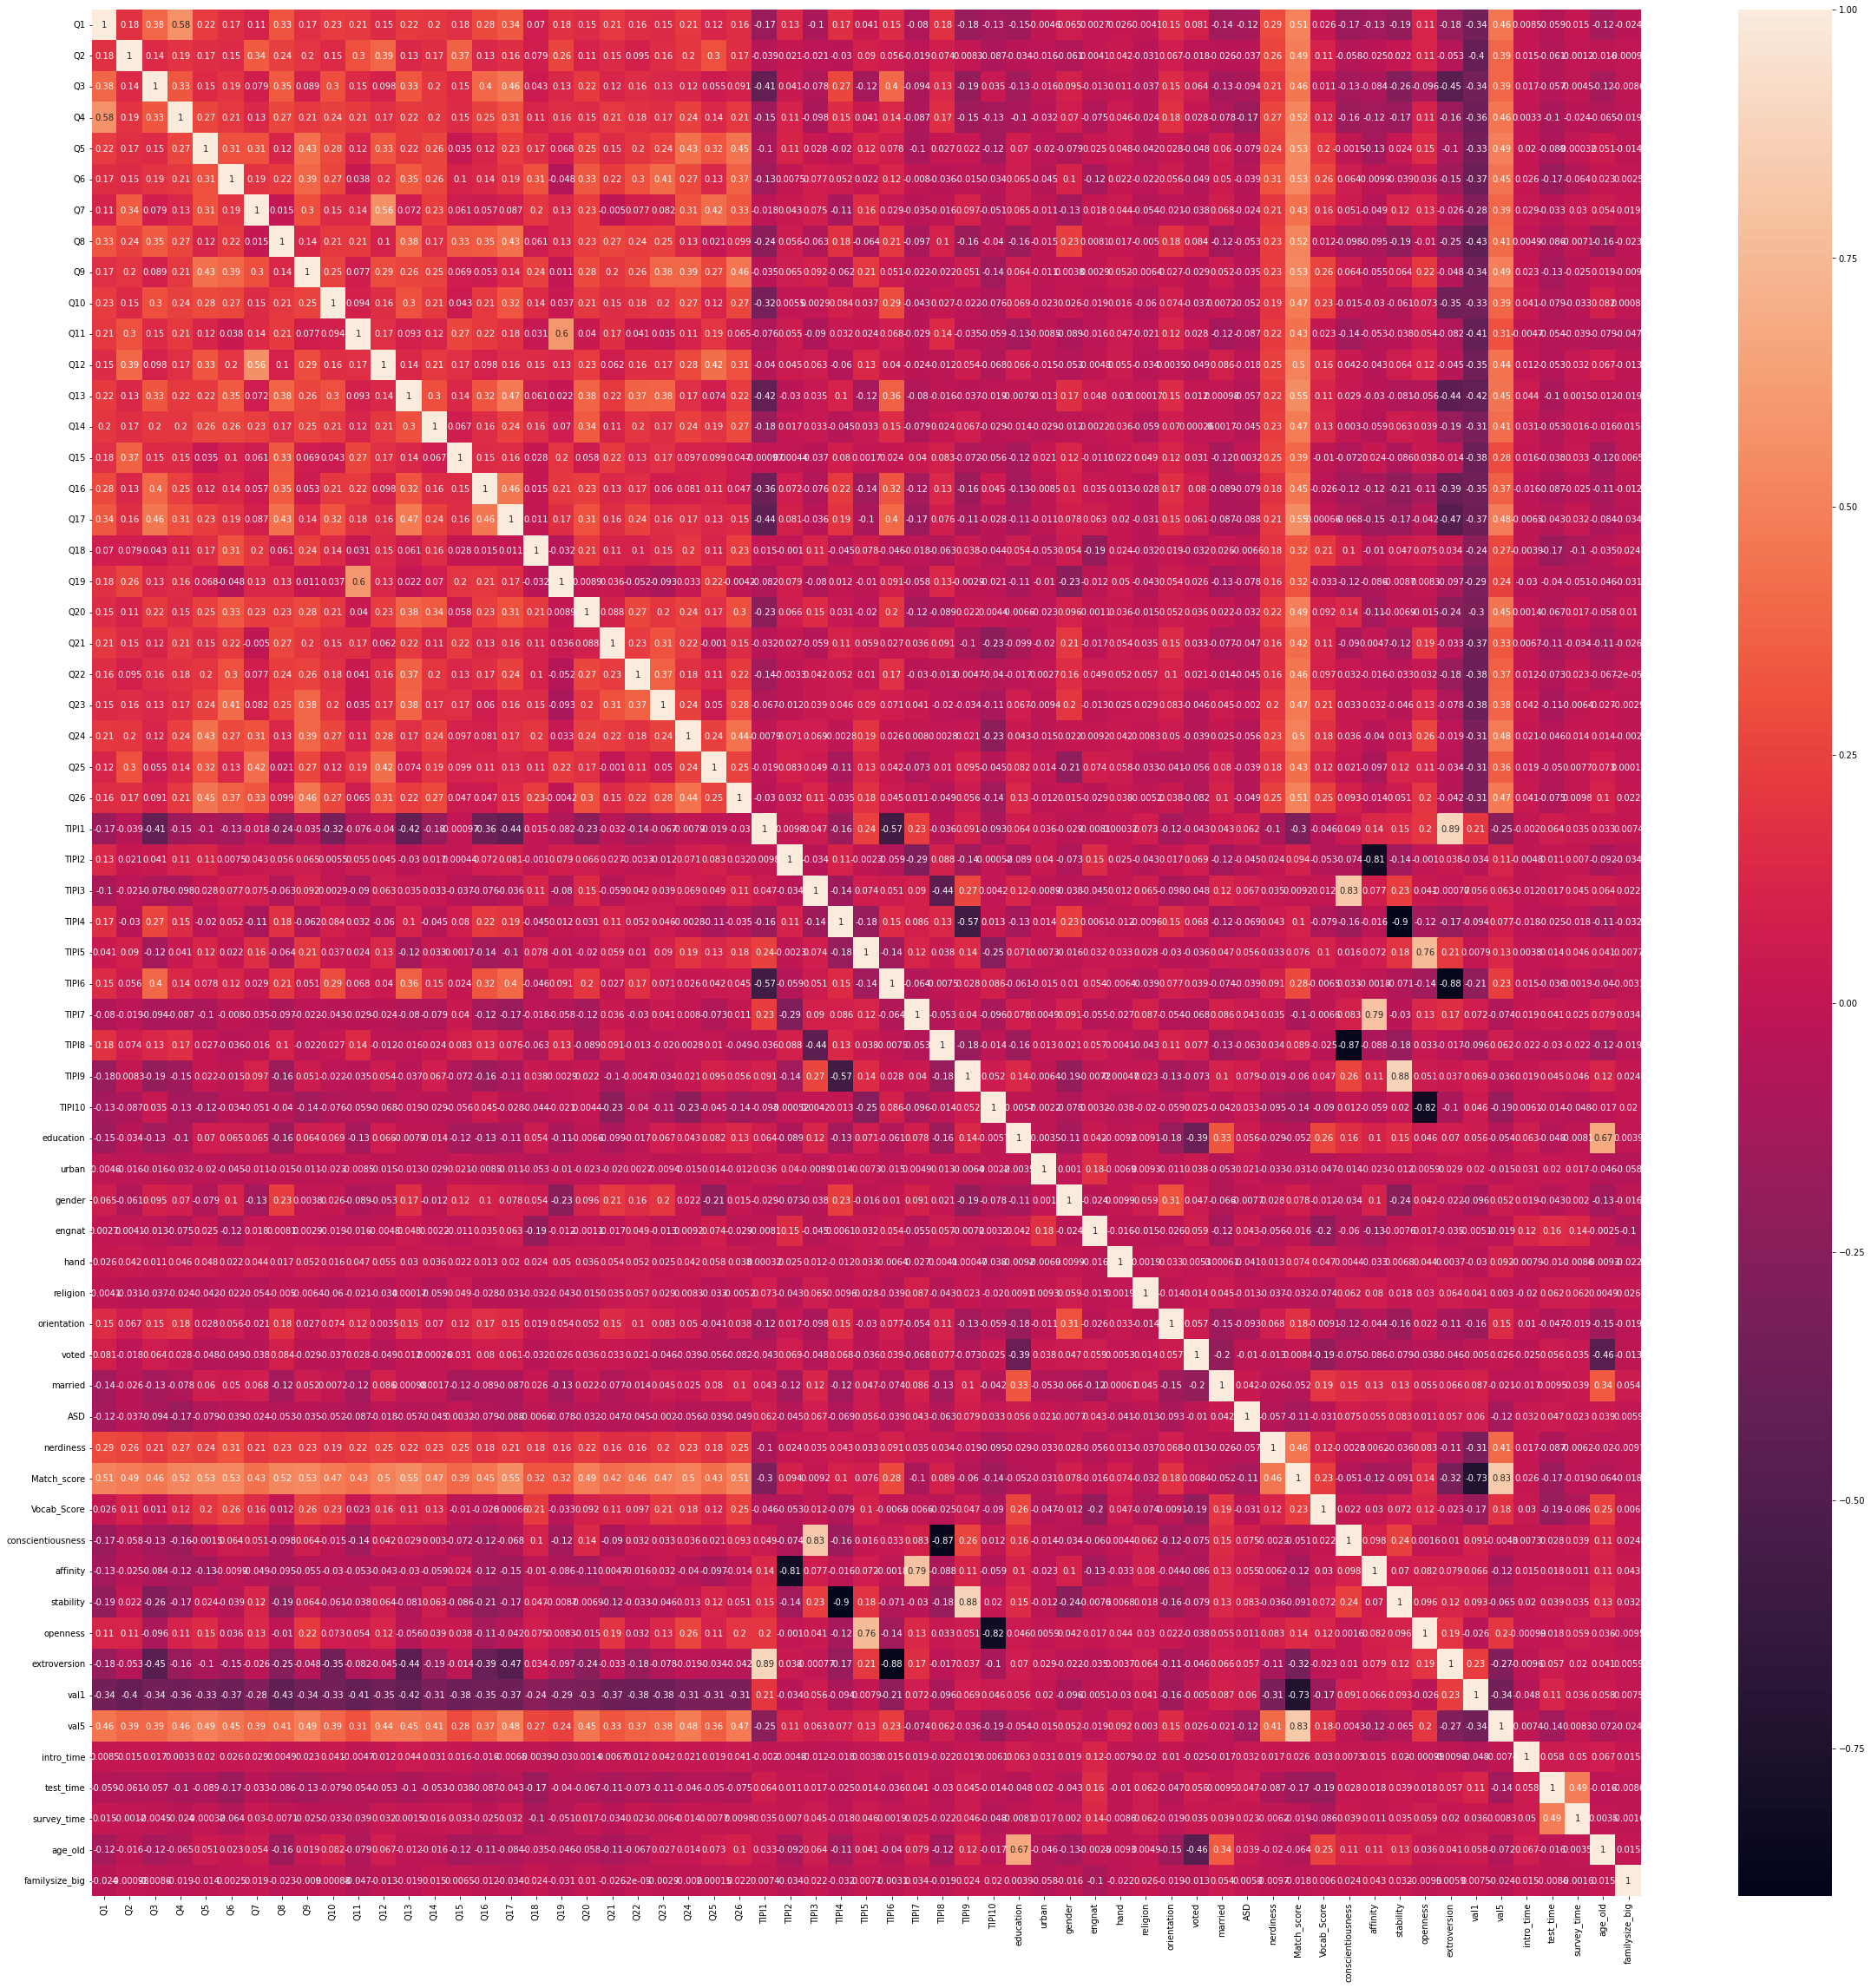

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,40))
sns.heatmap(train.loc[:,train.columns].corr(),
            annot=True
            )
plt.show()

# AutoML

In [1]:
from pycaret.classification import *

In [34]:
clf = setup(data = train,
            target = 'nerdiness',
            imputation_type='iterative',
            categorical_iterative_imputer='lightgbm')

,Description,Value
0,session_id,6230
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 61)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,52
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='nerdiness',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_byt...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough

In [35]:
best_models = compare_models(sort='AUC', n_select=3, fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7683,0.8550,0.8272,0.7730,0.7991,0.5261,0.5278,2.630
rf,Random Forest Classifier,0.7688,0.8514,0.8342,0.7704,0.8009,0.5264,0.5289,2.016
catboost,CatBoost Classifier,0.7551,0.8290,0.8291,0.7555,0.7905,0.4974,0.5007,9.033
lightgbm,Light Gradient Boosting Machine,0.7470,0.8202,0.8118,0.7535,0.7815,0.4821,0.4842,0.478
gbc,Gradient Boosting Classifier,0.7364,0.8065,0.8161,0.7384,0.7753,0.4583,0.4617,5.285
lda,Linear Discriminant Analysis,0.7272,0.7990,0.7942,0.7370,0.7644,0.4415,0.4434,0.752
lr,Logistic Regression,0.7267,0.7986,0.7889,0.7388,0.7629,0.4412,0.4427,2.558
ada,Ada Boost Classifier,0.7263,0.7954,0.8084,0.7299,0.7670,0.4373,0.4409,1.161
nb,Naive Bayes,0.6963,0.7584,0.7838,0.7048,0.7421,0.3755,0.3788,0.104
knn,K Neighbors Classifier,0.7004,0.7514,0.7578,0.7197,0.7381,0.3885,0.3894,3.048


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6230, verbose=0,
                     warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
 

In [41]:
blender = blend_models(estimator_list = best_models, fold = 10, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7752,0.8477,0.8444,0.7731,0.8072,0.5390,0.5421
1,0.7848,0.8572,0.8564,0.7792,0.8160,0.5582,0.5618
2,0.7752,0.8596,0.8632,0.7640,0.8106,0.5368,0.5428
3,0.7724,0.8544,0.8444,0.7695,0.8052,0.5329,0.5362
4,0.7552,0.8362,0.8291,0.7555,0.7905,0.4977,0.5008
5,0.7924,0.8716,0.8342,0.8013,0.8174,0.5770,0.5777
6,0.7876,0.8758,0.8427,0.7901,0.8156,0.5659,0.5675
7,0.7581,0.8630,0.8393,0.7542,0.7945,0.5025,0.5068
8,0.7714,0.8600,0.8308,0.7751,0.8020,0.5325,0.5343


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:VotingClassifier(estimators=[('et',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,

In [37]:
stacker = stack_models(best_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7600,0.8414,0.8188,0.7664,0.7917,0.5093,0.5109
1,0.7914,0.8599,0.8444,0.7942,0.8186,0.5739,0.5754
2,0.7619,0.8513,0.8325,0.7621,0.7958,0.5117,0.5146
3,0.7752,0.8535,0.8256,0.7828,0.8037,0.5413,0.5423
4,0.7533,0.8414,0.8137,0.7604,0.7861,0.4956,0.4972
5,0.7829,0.8689,0.8222,0.7950,0.8084,0.5580,0.5584
6,0.7857,0.8783,0.8291,0.7951,0.8117,0.5633,0.5640
7,0.7543,0.8548,0.8068,0.7650,0.7854,0.4985,0.4995
8,0.7800,0.8605,0.8222,0.7911,0.8064,0.5519,0.5525


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                      

In [39]:
pred_holdout = predict_model(stacker)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.7721,0.8585,0.8214,0.7741,0.7971,0.5376,0.5388


In [43]:
final_model = finalize_model(stacker)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_sampl

# Submission

In [44]:
predictions = predict_model(final_model, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=StackingClassifier(cv=5,
                   estimators=[('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples

In [45]:
predictions

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,extroversion,val1,val5,intro_time,test_time,survey_time,age_old,familysize_big,Label,Score
index,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,0.000000,0.423077,0.0,1.0,1.0,0.0,1.0,0,0.9814
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,0.038462,0.461538,1.0,1.0,1.0,1.0,1.0,1,0.8360
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.5,0.076923,0.576923,0.0,0.0,1.0,0.0,1.0,1,0.8464
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.5,0.076923,0.269231,1.0,1.0,1.0,1.0,1.0,1,0.8576
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.5,0.076923,0.615385,1.0,1.0,1.0,0.0,1.0,1,0.9368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,3.0,0.000000,0.384615,1.0,1.0,1.0,0.0,1.0,1,0.9471
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,2.0,0.000000,0.692308,1.0,1.0,0.0,0.0,1.0,1,0.8179
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2.0,0.076923,0.846154,1.0,1.0,1.0,1.0,1.0,1,0.9428


In [60]:
def new_score(df):
  new_score = []

  for _, row in df.iterrows():
    if row['Label'] == 0:
      new_score.append(1-row['Score'])
    else:
      new_score.append(row['Score'])

  return np.round(new_score,5)

predictions.loc[:,'NewScore'] = new_score(predictions)
predictions

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,val1,val5,intro_time,test_time,survey_time,age_old,familysize_big,Label,Score,NewScore
index,,,,,,,,,,,,,,,,,,,,,
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,0.000000,0.423077,0.0,1.0,1.0,0.0,1.0,0,0.9814,0.0186
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,0.038462,0.461538,1.0,1.0,1.0,1.0,1.0,1,0.8360,0.8360
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,0.076923,0.576923,0.0,0.0,1.0,0.0,1.0,1,0.8464,0.8464
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,0.076923,0.269231,1.0,1.0,1.0,1.0,1.0,1,0.8576,0.8576
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,0.076923,0.615385,1.0,1.0,1.0,0.0,1.0,1,0.9368,0.9368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,0.000000,0.384615,1.0,1.0,1.0,0.0,1.0,1,0.9471,0.9471
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,0.000000,0.692308,1.0,1.0,0.0,0.0,1.0,1,0.8179,0.8179
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0.076923,0.846154,1.0,1.0,1.0,1.0,1.0,1,0.9428,0.9428


In [61]:
submission["nerdiness"] = predictions.loc[:,'NewScore']

In [62]:
submission.iloc[:10]

,nerdiness
index,
0,0.0186
1,0.8360
2,0.8464
3,0.8576
4,0.9368
5,0.0163
6,0.5125
7,0.9117
8,0.3164


In [63]:
submission.to_csv('predictions.csv', index=True)